# QUESTION NO 1

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')

# Display the first few rows of the dataset
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

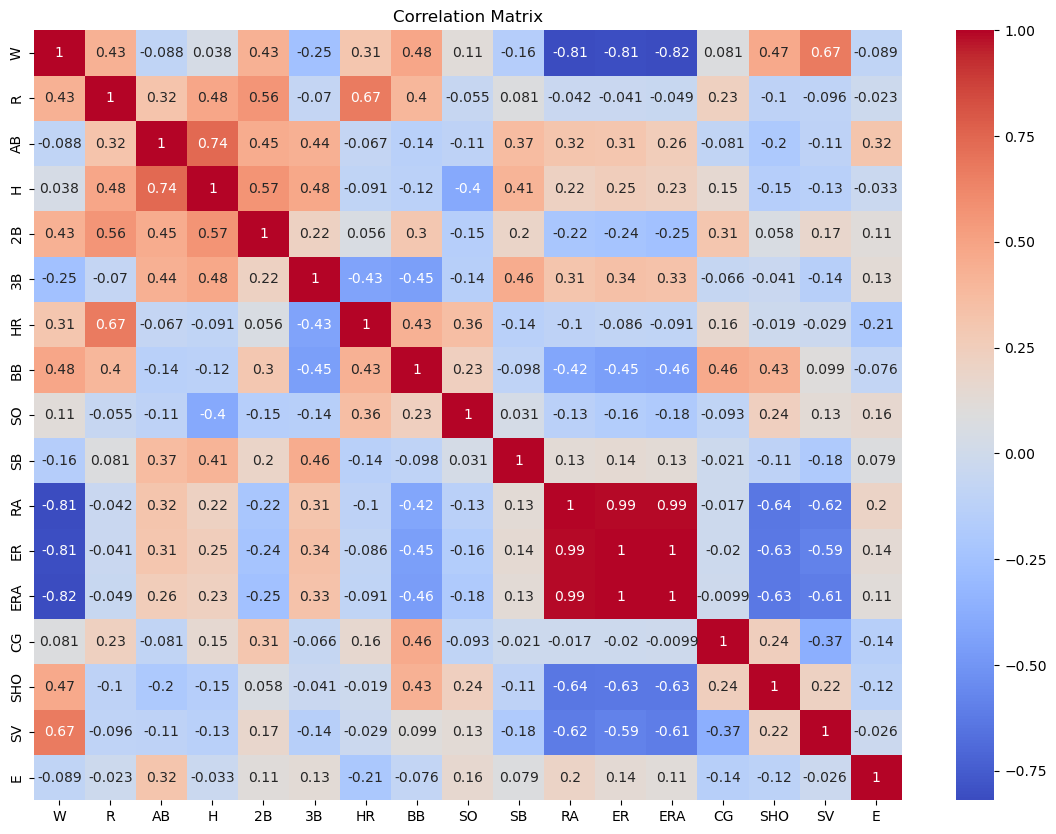

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to see the correlation between features
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

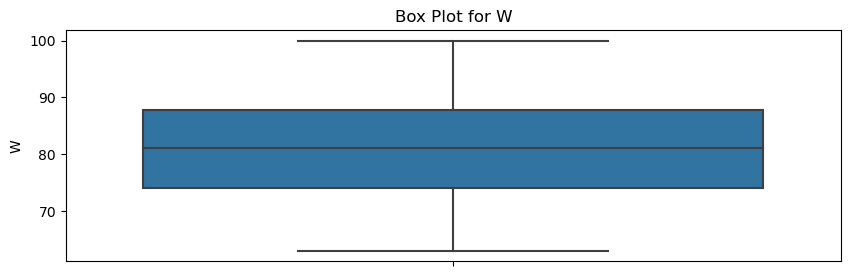

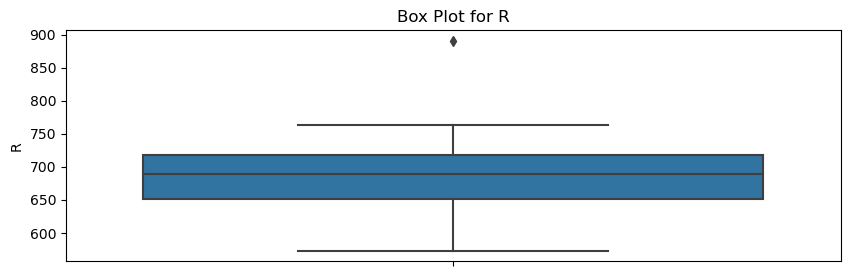

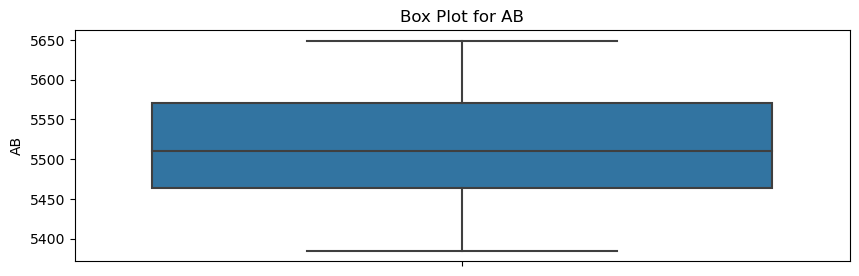

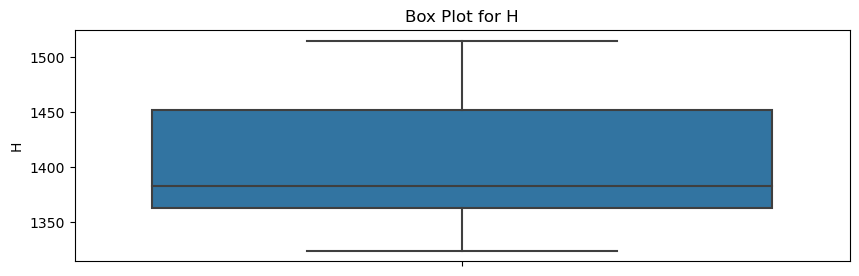

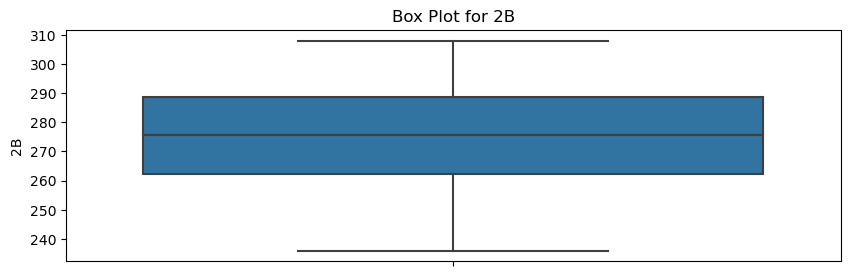

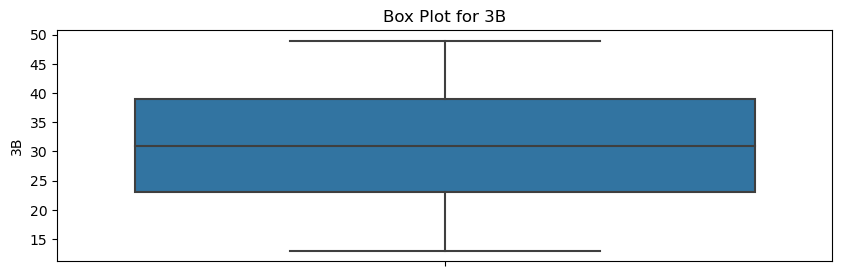

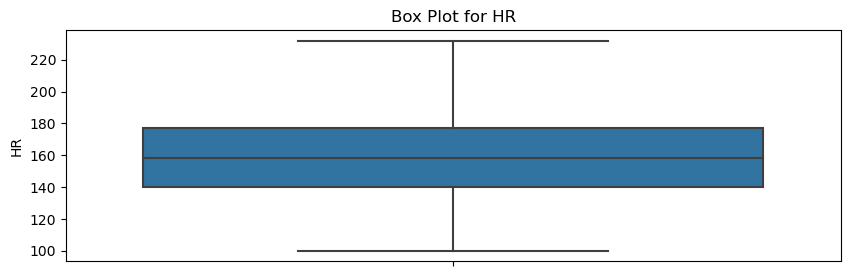

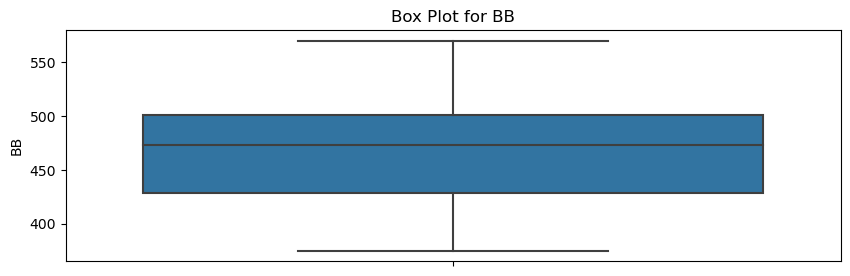

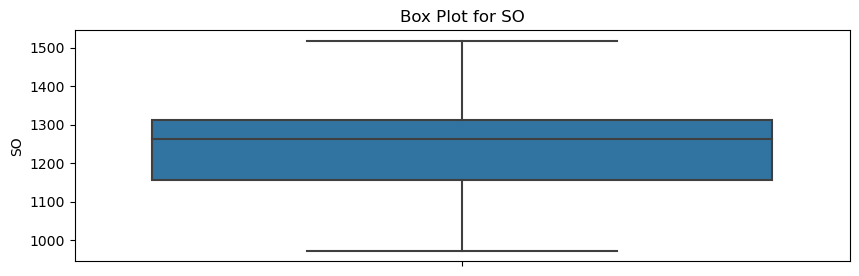

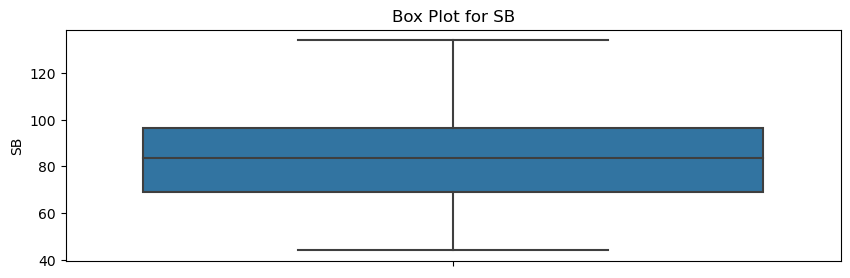

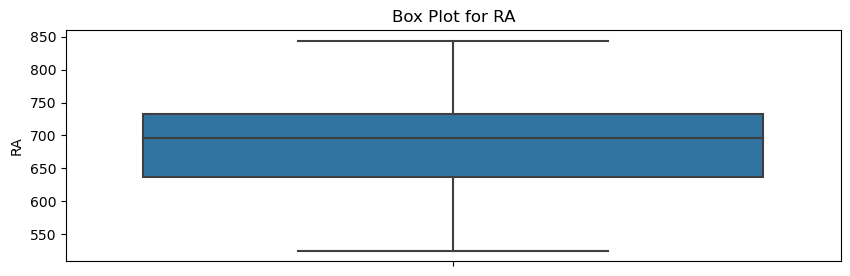

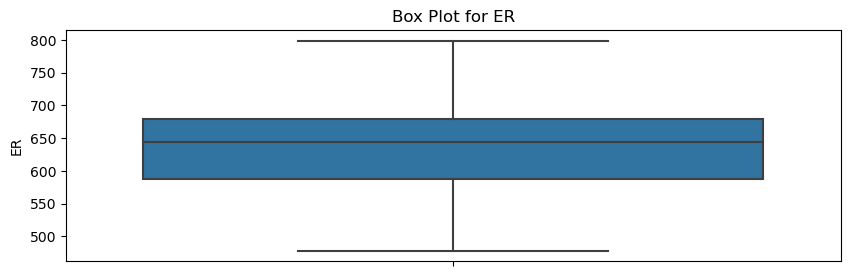

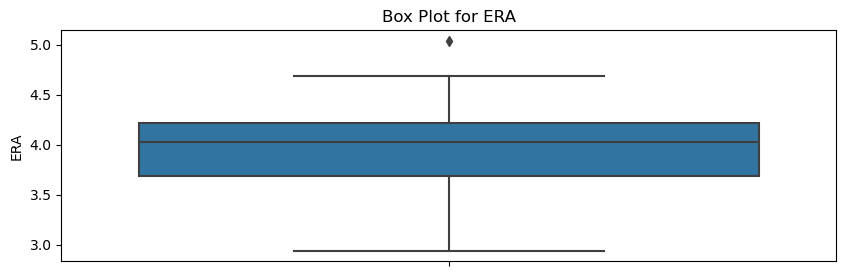

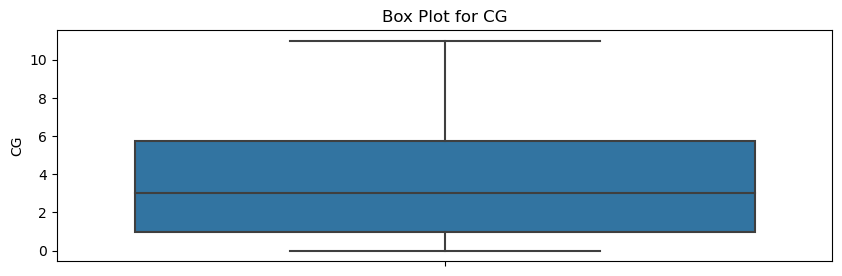

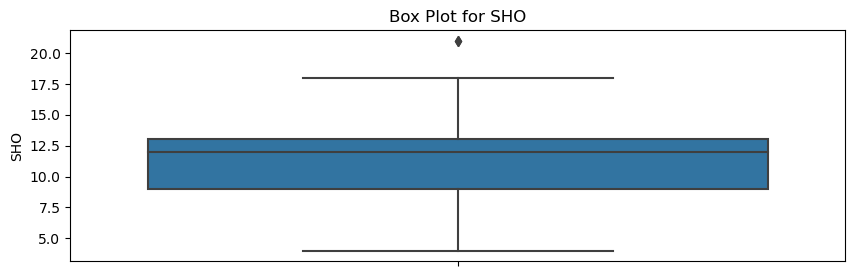

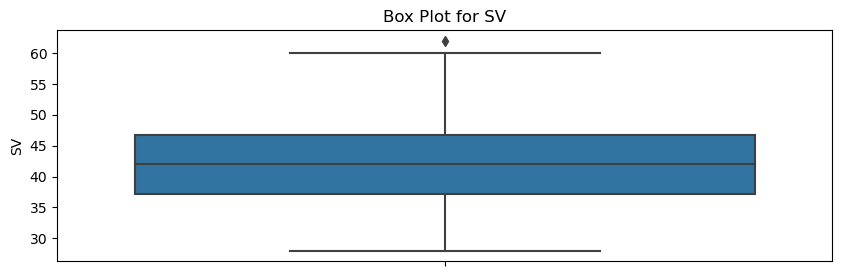

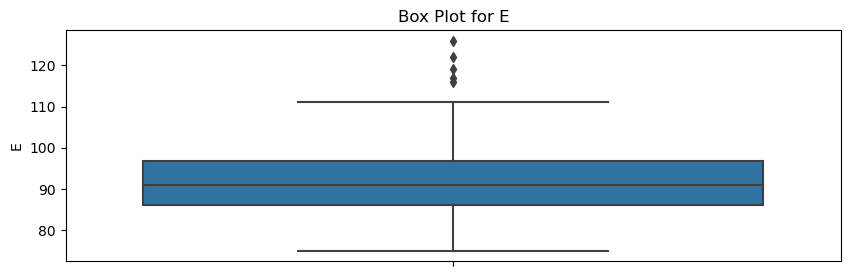

In [49]:
for column in df.columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(y=column, data=df)
    plt.title(f'Box Plot for {column}')
    plt.show()

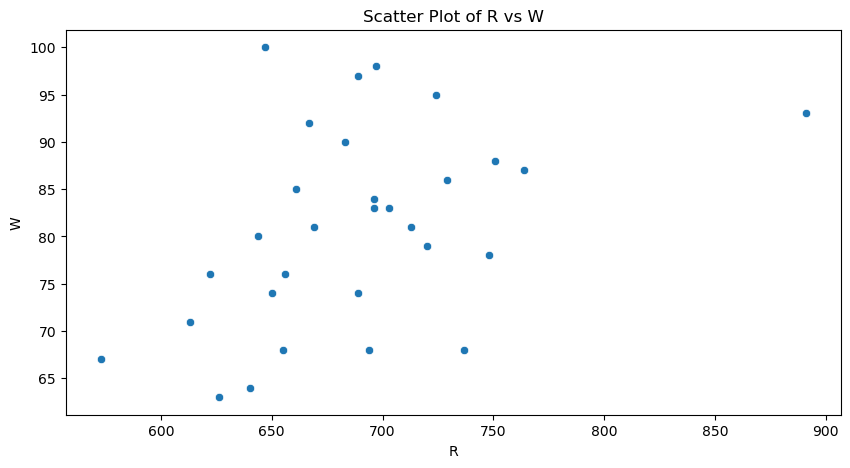

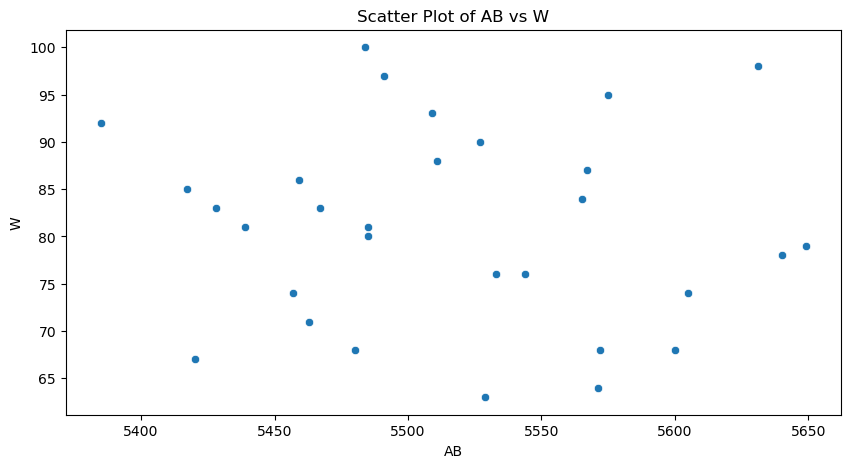

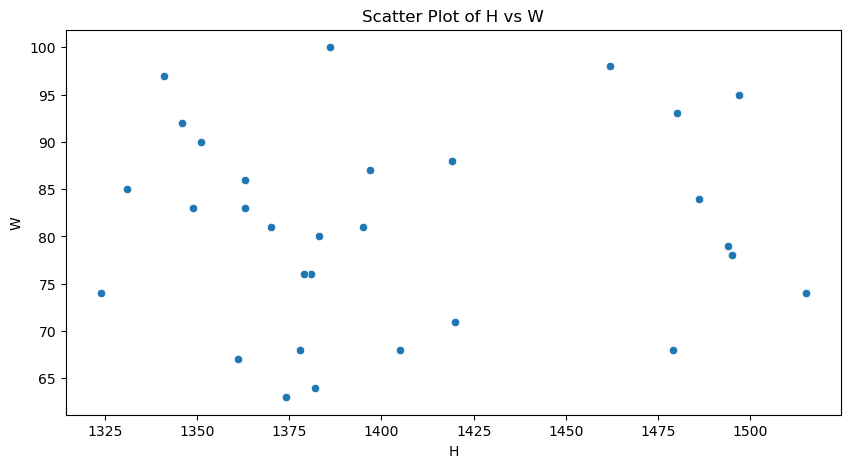

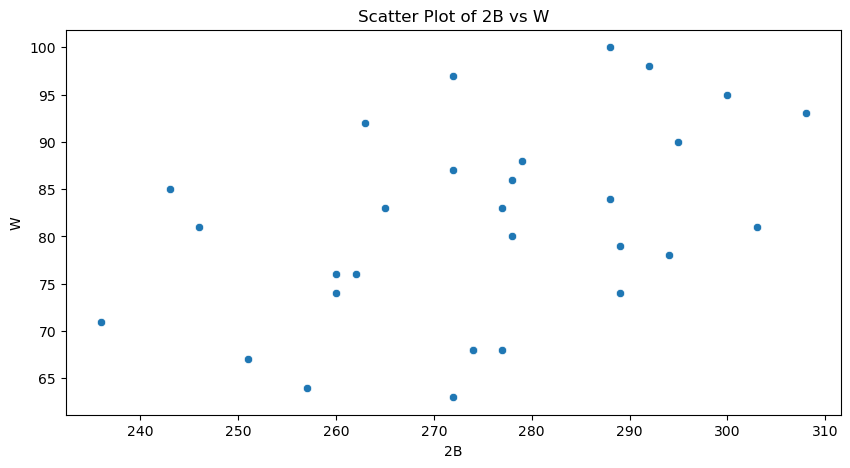

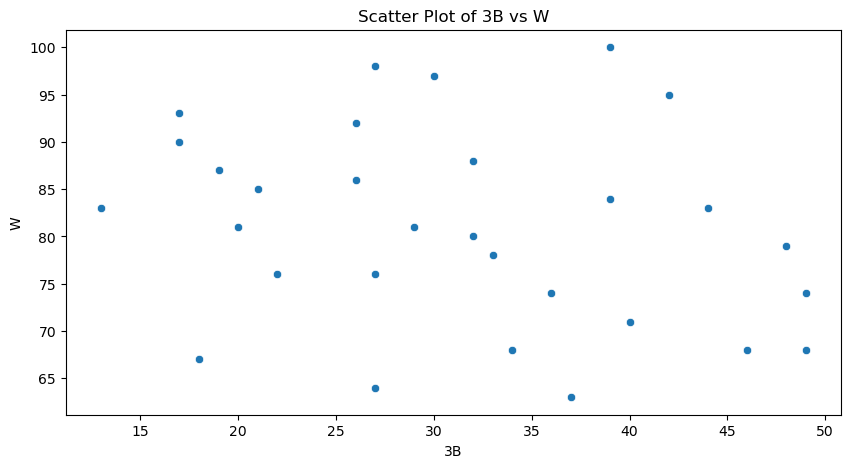

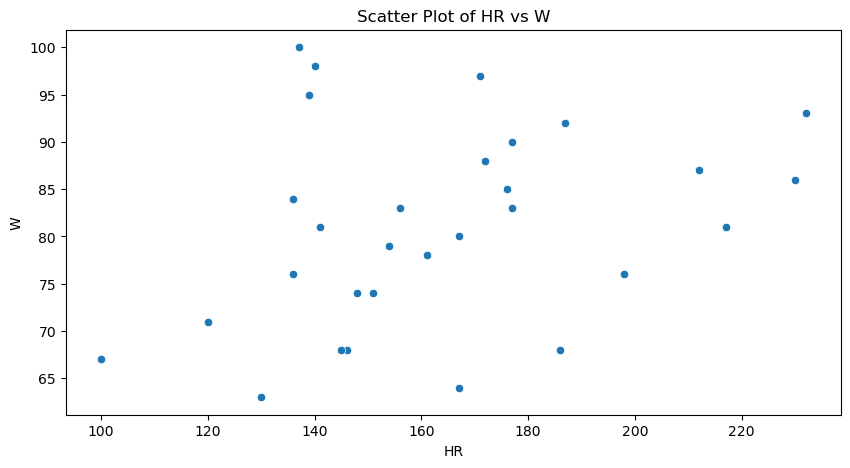

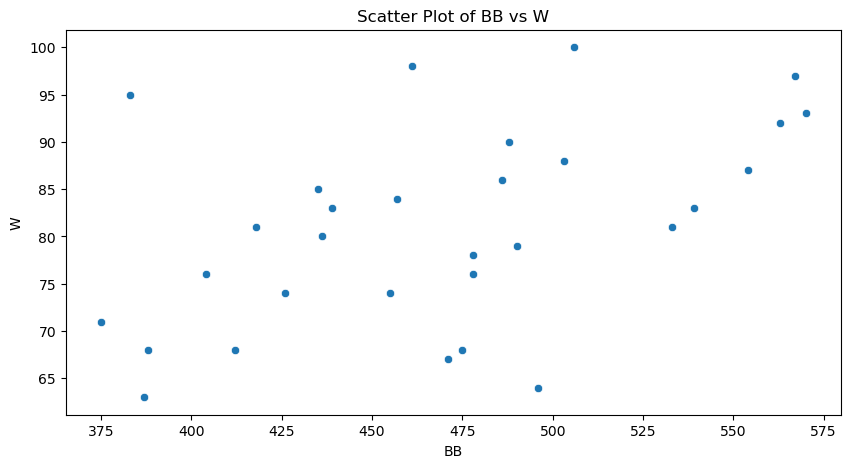

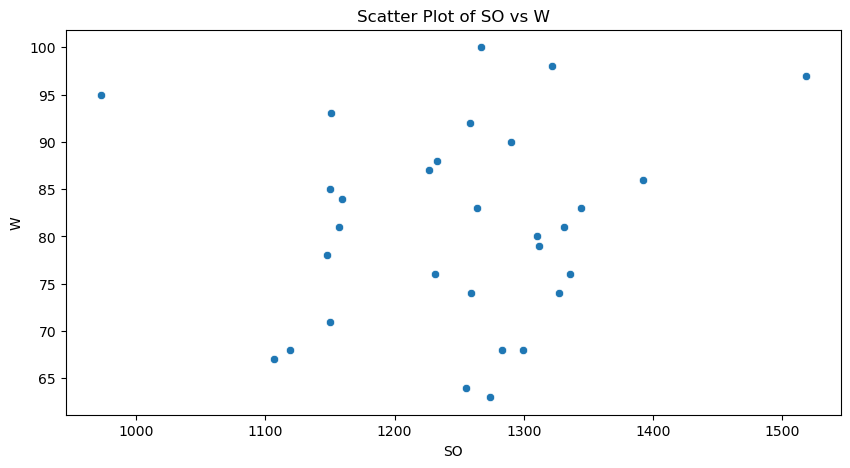

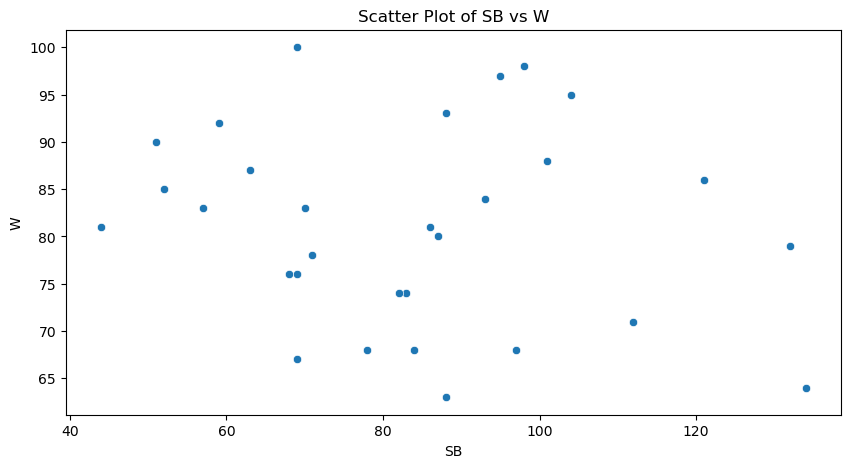

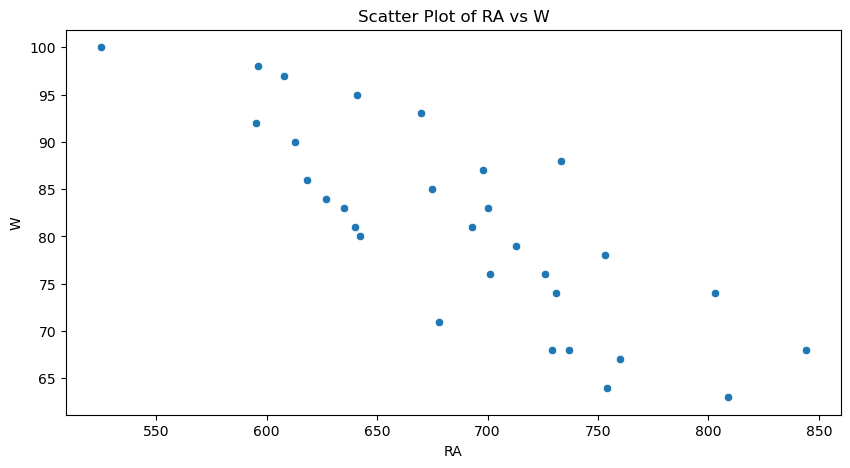

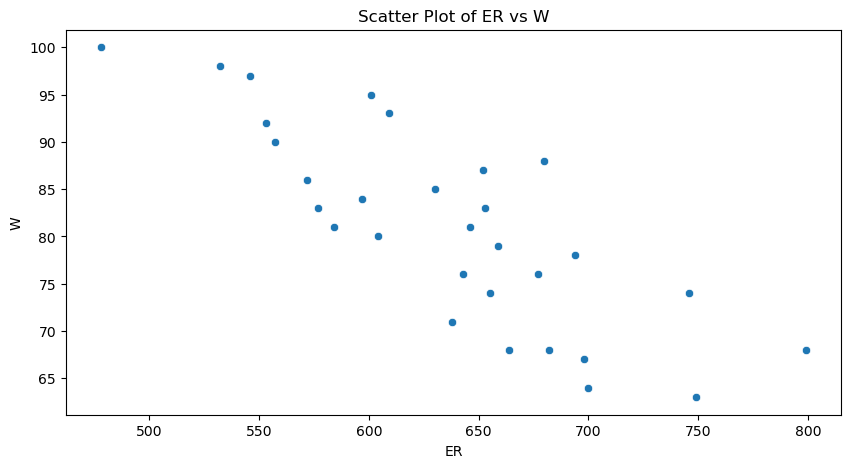

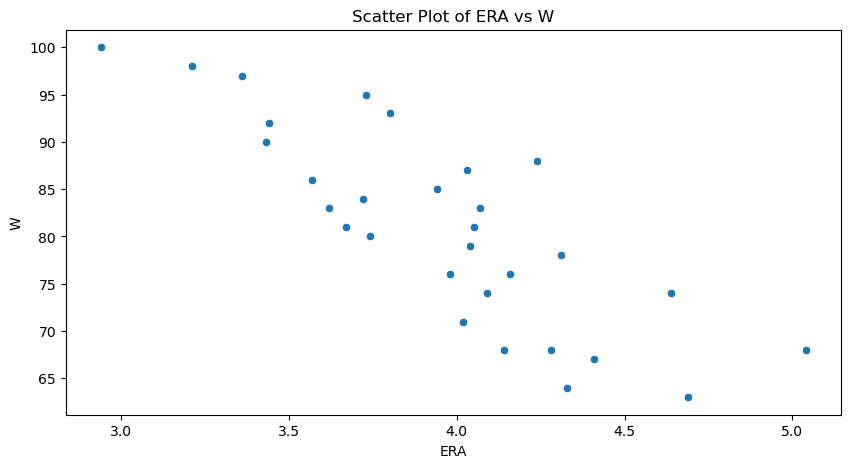

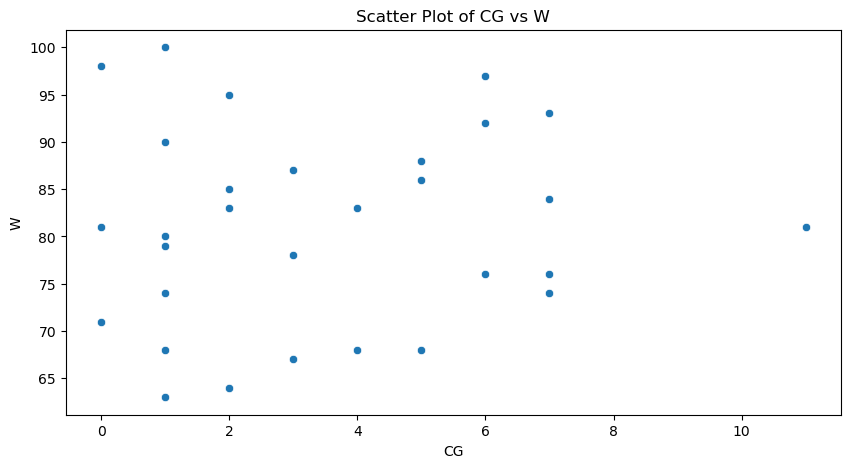

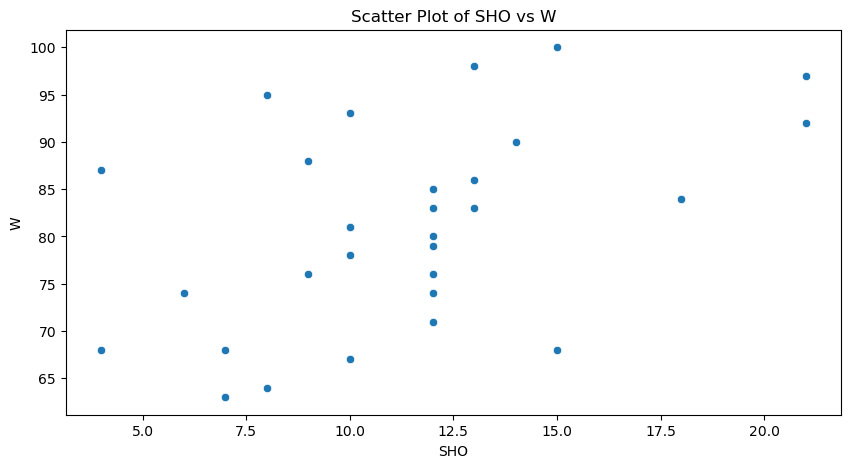

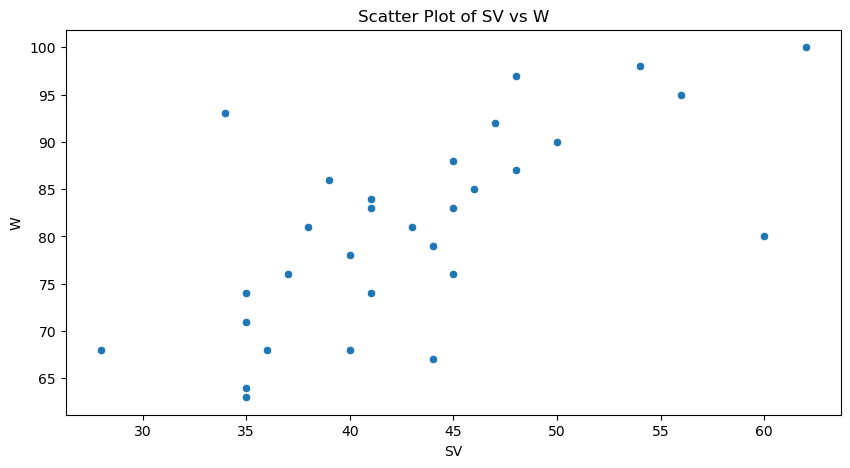

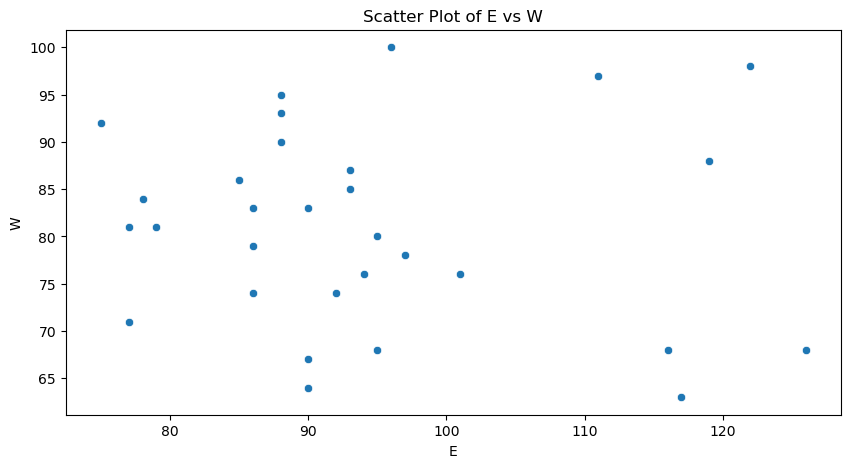

In [9]:
for column in df.columns:
    if column != 'W':
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=column, y='W', data=df)
        plt.title(f'Scatter Plot of {column} vs W')
        plt.show()

In [11]:
# Example: Create polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df.drop(columns=['W']))

In [33]:
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df.columns.drop('W')))
poly_df['W'] = df['W']

# Use poly_df for further steps if needed

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
X = df.drop(columns=['W'])
y = df['W']

In [35]:
X

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [36]:
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
y_train_pred_lin = lin_reg.predict(X_train)
y_test_pred_lin = lin_reg.predict(X_test)

In [40]:
mse_train_lin = mean_squared_error(y_train, y_train_pred_lin)
mse_test_lin = mean_squared_error(y_test, y_test_pred_lin)

In [41]:
r2_train_lin = r2_score(y_train, y_train_pred_lin)
r2_test_lin = r2_score(y_test, y_test_pred_lin)

In [42]:
print(f'Linear Regression - Train MSE: {mse_train_lin}, Test MSE: {mse_test_lin}')
print(f'Linear Regression - Train R2: {r2_train_lin}, Test R2: {r2_test_lin}')

Linear Regression - Train MSE: 2.521469259954159, Test MSE: 27.943032506666906
Linear Regression - Train R2: 0.9740426384448528, Test R2: 0.7876400316149443


In [43]:
# Random Forest Evaluation
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest - Train MSE: {mse_train_rf}, Test MSE: {mse_test_rf}')
print(f'Random Forest - Train R2: {r2_train_rf}, Test R2: {r2_test_rf}')

Random Forest - Train MSE: 8.246170833333336, Test MSE: 51.967916666666675
Random Forest - Train R2: 0.9151094795539033, Test R2: 0.6050569981000633


In [44]:
y_pred = rf.predict(X_test)

# Compare predictions with actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

    Actual  Predicted
27      79      80.51
15     100      86.60
23      67      73.07
17      97      88.84
8       80      85.15


In [45]:
# Save the model for future use (optional)
import joblib

joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

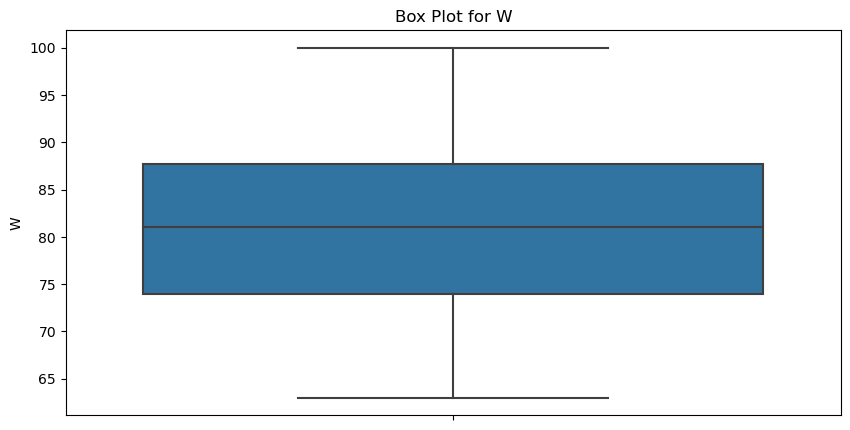

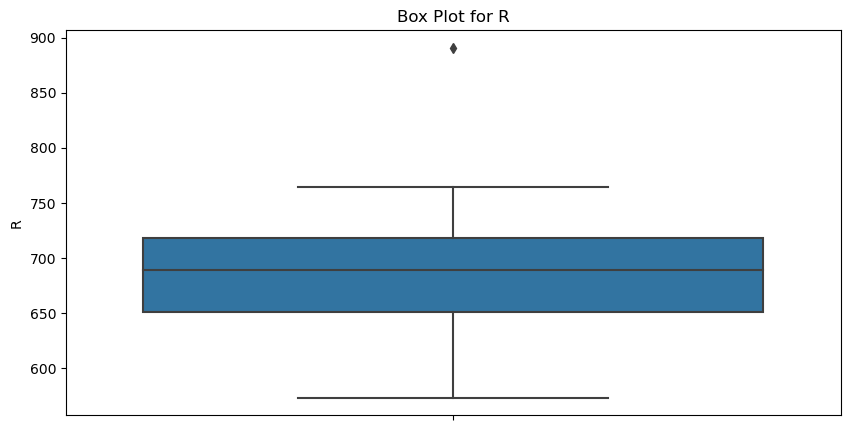

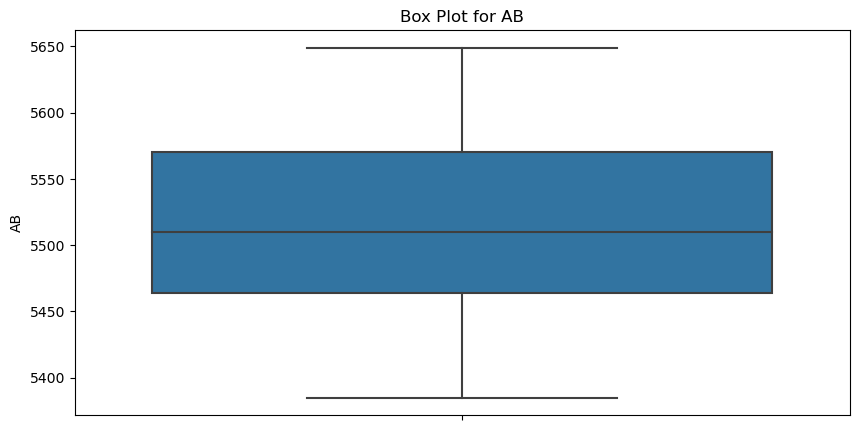

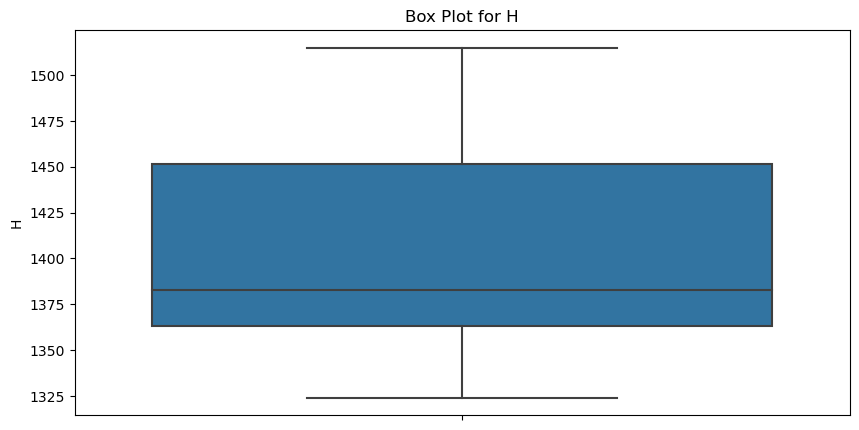

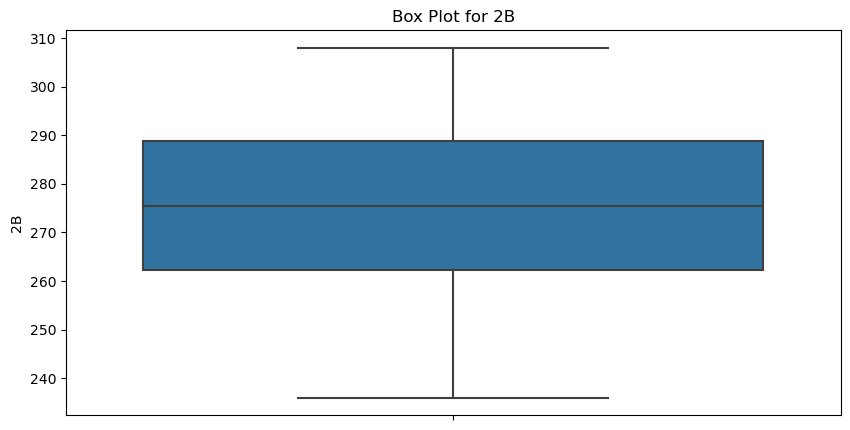

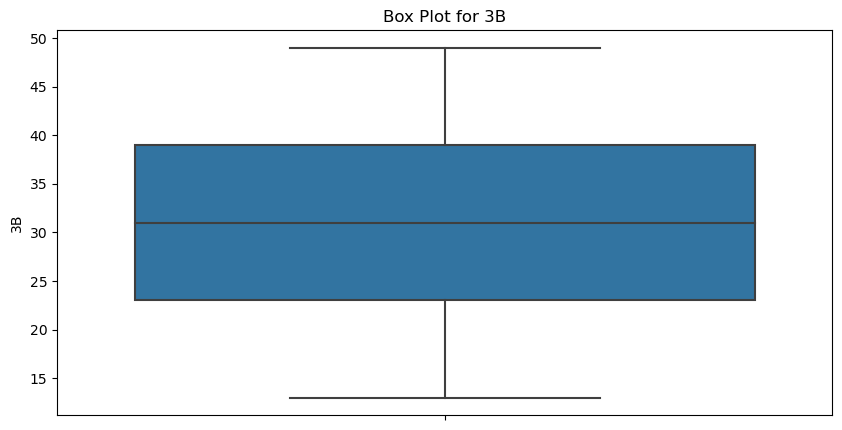

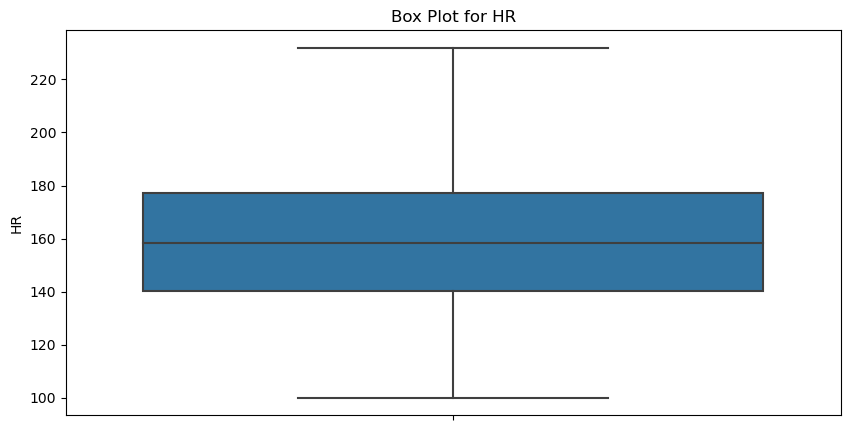

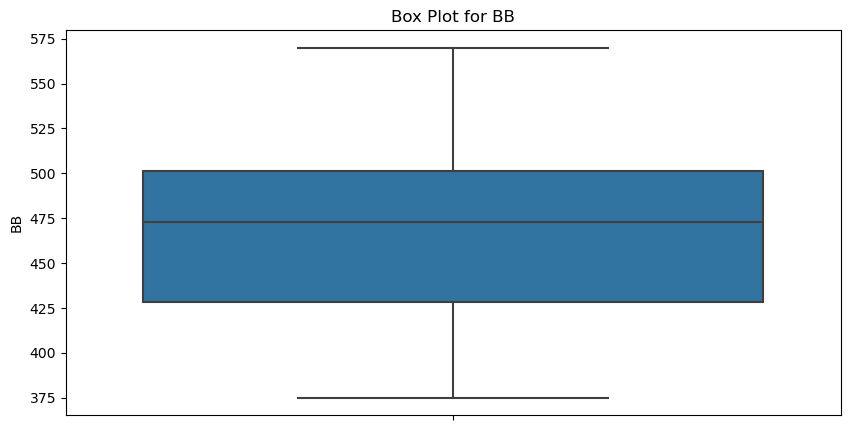

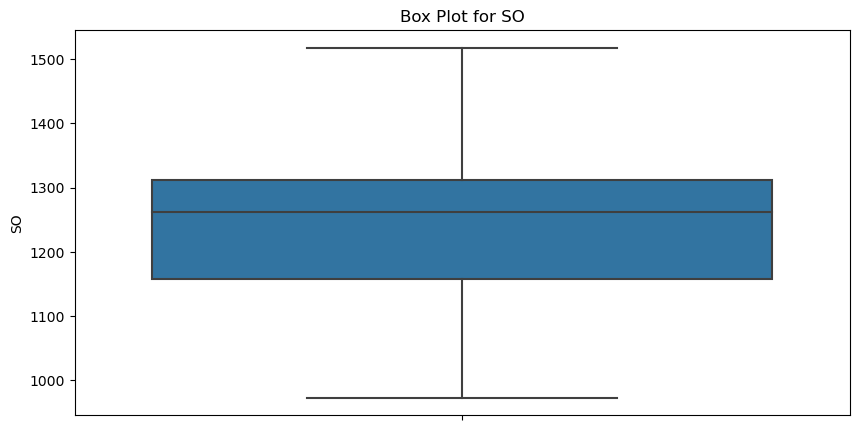

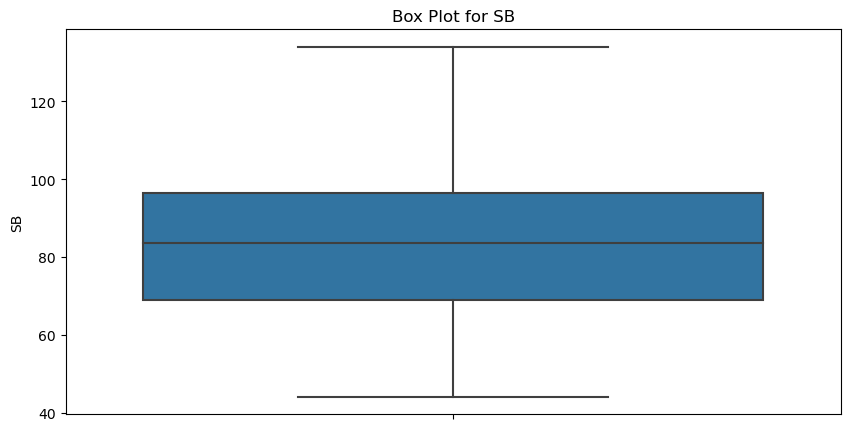

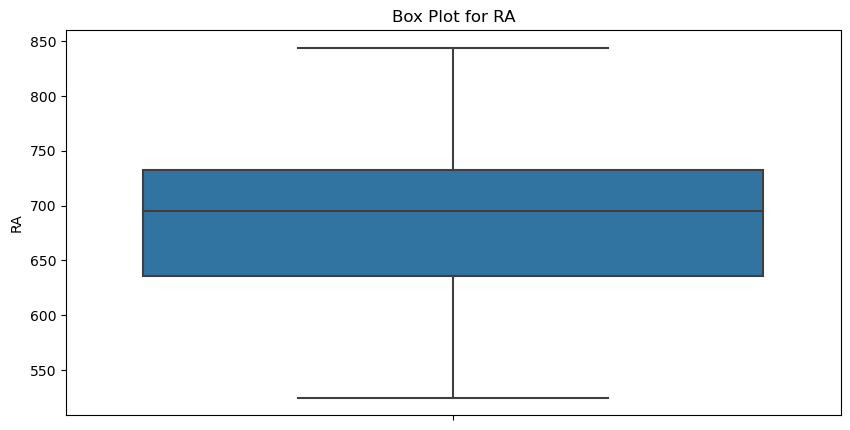

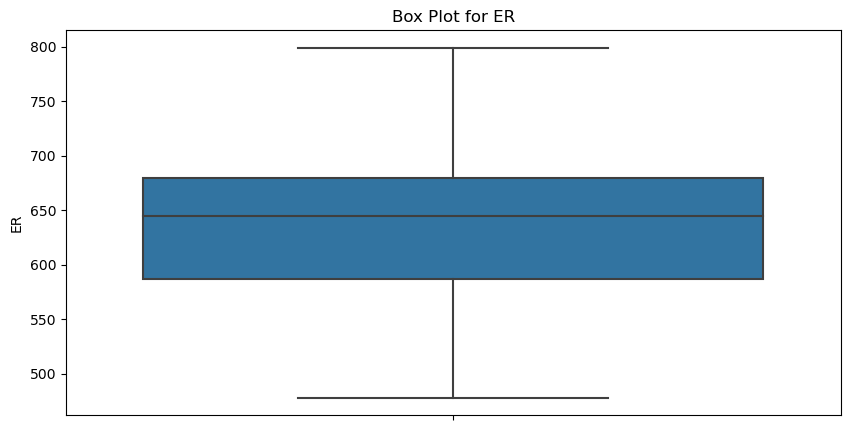

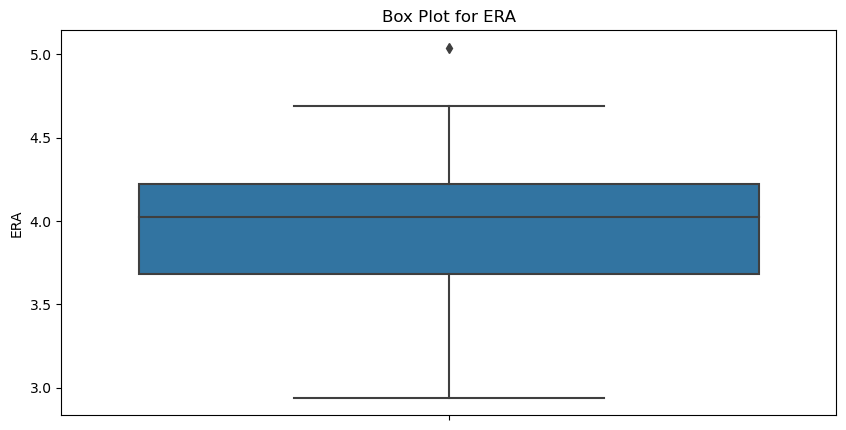

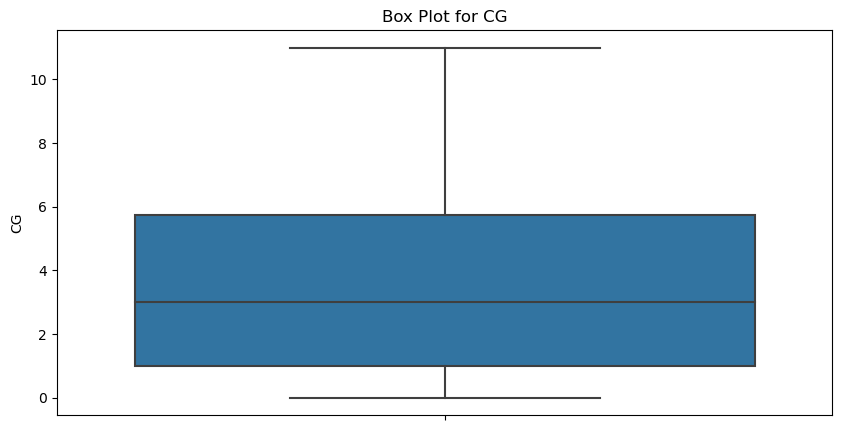

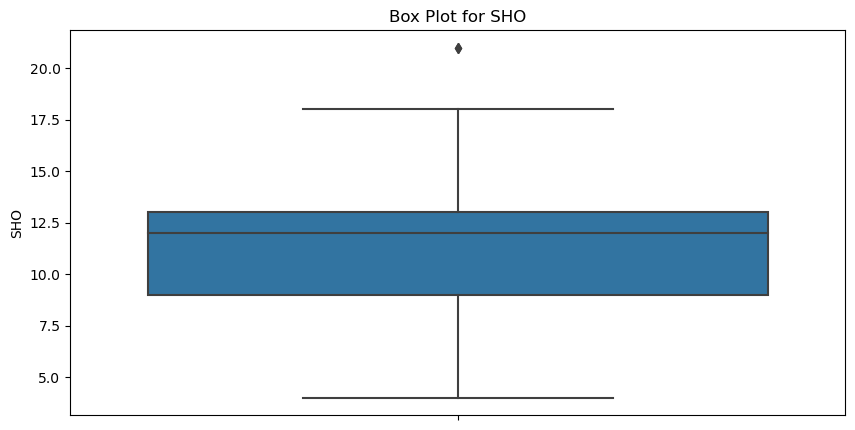

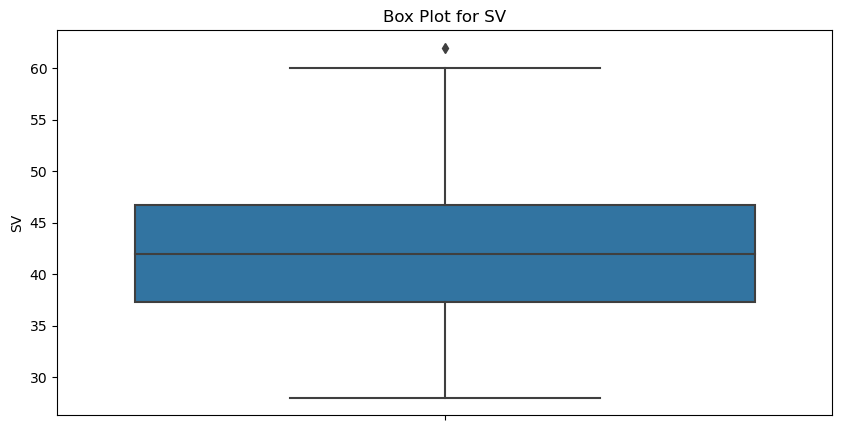

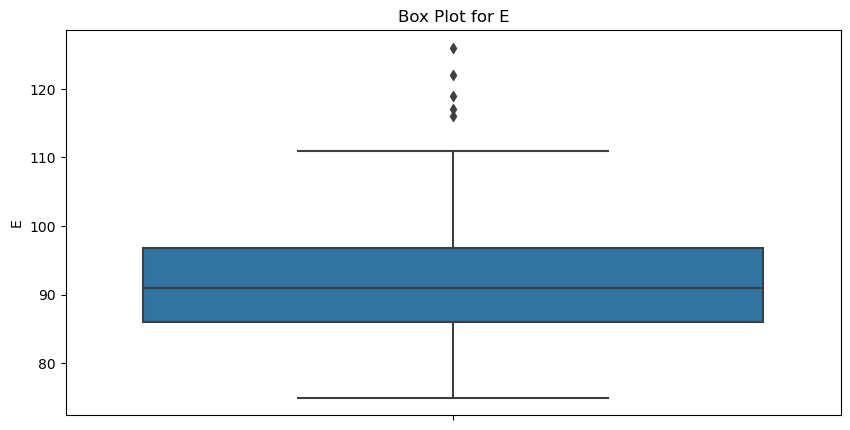

In [46]:
for column in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=column, data=df)
    plt.title(f'Box Plot for {column}')
    plt.show()